In [1]:
# Project 1: House Price Prediction
# Predicted housing costs using Linear Regression, analyzing the impact of key features on market value

import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# PART 1: DATA ENGINEERING (ETL Process) 

def fetch_housing_data():
    # URL acting as an API Endpoint (using California Housing Dataset)
    url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
    
    # Send GET request to the API
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Convert raw string content to a Pandas DataFrame
        content = response.content.decode('utf-8')
        df = pd.read_csv(io.StringIO(content))
        return df
    else:
        print("Failed to retrieve data")
        return pd.DataFrame()

# 1. Load Data
print("Fetching data from API...")
df_raw = fetch_housing_data()

# 2. Preprocessing (Transform)
# Select numerical features and target
features = ['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_income'] # Added median_income as it is usually a strong predictor
target = 'median_house_value'

# Check if columns exist before selecting
available_features = [f for f in features if f in df_raw.columns]
df = df_raw[available_features + [target]].copy()

# Handle missing values 
if 'total_bedrooms' in df.columns:
    df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

print(f"Data loaded successfully: {df.shape[0]} rows.")



Fetching data from API...
Data loaded successfully: 20640 rows.



 Starting Data Analytics 

Descriptive Statistics:
        total_rooms  total_bedrooms  housing_median_age  median_income  \
count  20640.000000    20640.000000        20640.000000   20640.000000   
mean    2635.763081      536.838857           28.639486       3.870671   
std     2181.615252      419.391878           12.585558       1.899822   
min        2.000000        1.000000            1.000000       0.499900   
25%     1447.750000      297.000000           18.000000       2.563400   
50%     2127.000000      435.000000           29.000000       3.534800   
75%     3148.000000      643.250000           37.000000       4.743250   
max    39320.000000     6445.000000           52.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000  


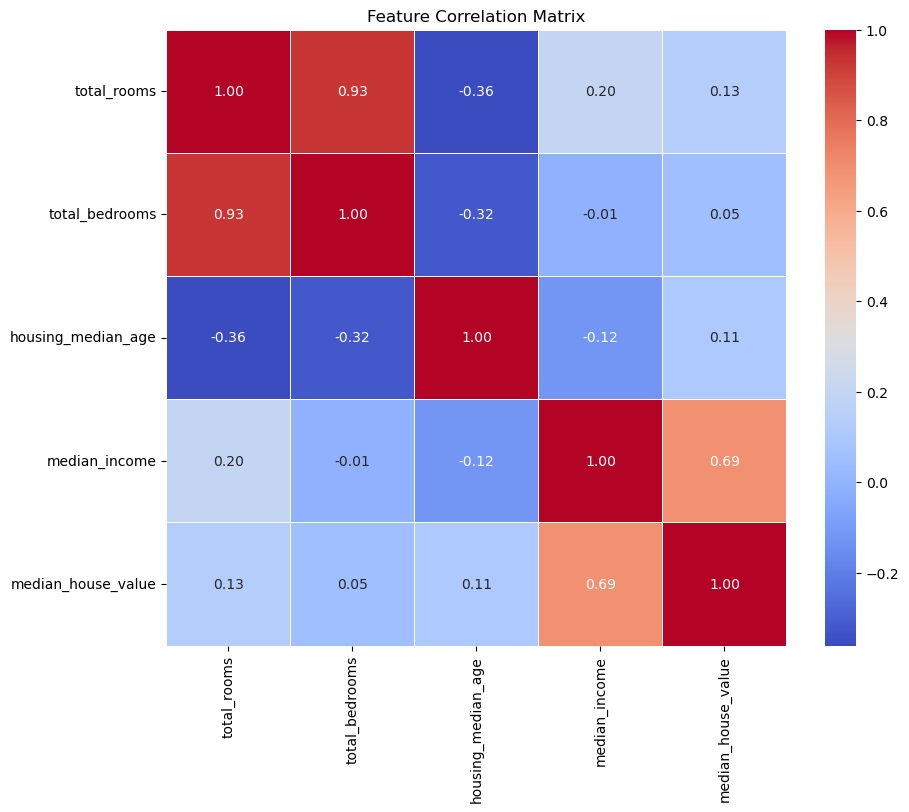


Top correlations with Target:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
total_bedrooms        0.049457
Name: median_house_value, dtype: float64


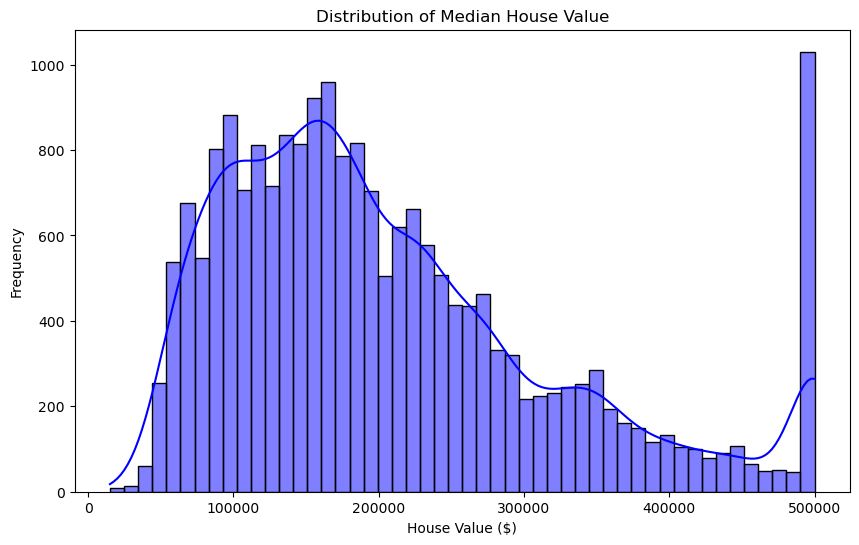

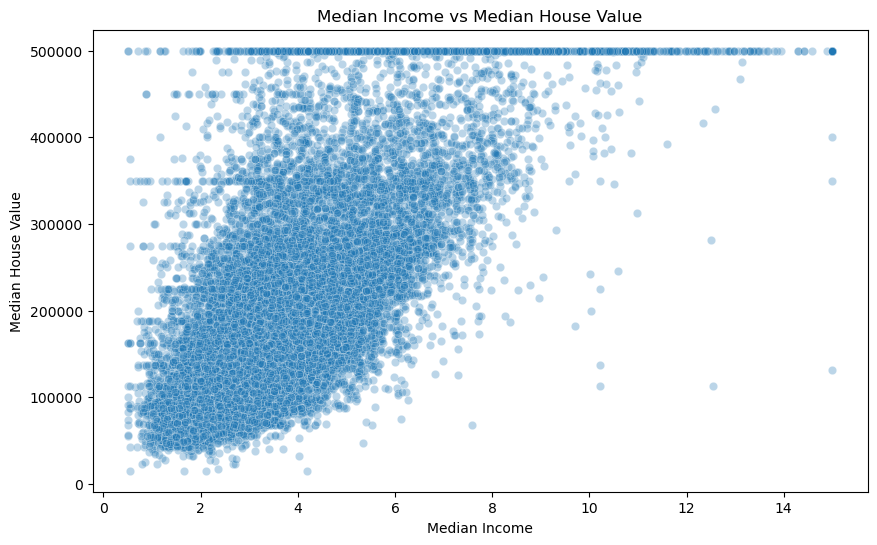

In [2]:
# PART 2: DATA ANALYTICS (EDA) 
print("\n Starting Data Analytics \n")

# A. Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# B. Correlation Matrix Visualization
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr_matrix = df.corr()
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

print("\nTop correlations with Target:")
print(corr_matrix[target].sort_values(ascending=False))

# C. Distribution of the Target Variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df[target], bins=50, kde=True, color='blue')
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($)")
plt.ylabel("Frequency")
plt.show()

# D. Scatter Plot: Income vs House Value (Usually the strongest relationship)
if 'median_income' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['median_income'], y=df[target], alpha=0.3)
    plt.title("Median Income vs Median House Value")
    plt.xlabel("Median Income")
    plt.ylabel("Median House Value")
    plt.show()



In [3]:
# PART 3: MACHINE LEARNING 

# 3. Split Data
X = df[available_features]
y = df[target]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 

print("\n Model Evaluation ")
# Display coefficients alongside feature names
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
print(f"\nRoot Mean Squared Error (RMSE): ${rmse:,.2f}")

# 6. Predict for a new house
# Ensure we provide data for all features used in training
# Example data: 2000 rooms, 400 bedrooms, 20 years old, 5.0 median income score
new_house_data = [2000, 400, 20, 5.0] 
# Filter new data based on available features
new_data_dict = {
    'total_rooms': [2000],
    'total_bedrooms': [400],
    'housing_median_age': [20],
    'median_income': [5.0]
}
# Only keep keys that are in available_features
filtered_new_data = {k: v for k, v in new_data_dict.items() if k in available_features}

new_data_df = pd.DataFrame(filtered_new_data)
price_pred = model.predict(new_data_df)
print(f"\nPredicted median value for new block: ${price_pred[0]:,.2f}")


 Model Evaluation 
                     Coefficient
total_rooms           -26.614158
total_bedrooms        162.583351
housing_median_age   1943.938462
median_income       49852.523974

Root Mean Squared Error (RMSE): $79,728.09

Predicted median value for new block: $240,827.08


**Model Interpretation Summary**

Key Drivers (Coefficients):

**+ Median Income:** The strongest predictor. A 1-unit increase in income score raises house value by ~$49,852.

**+ House Age:** Older houses tend to be worth slightly more (+$1,944 per year).

**+ Rooms vs. Bedrooms:** Total_rooms has a negative coefficient (-26) while total_bedrooms is positive (+162). This contradiction is due to multicollinearity (the two features overlap significantly).

**+ Accuracy (RMSE):** The model's predictions are off by an average of $79,728, indicating the model is somewhat "rough" (underfitting).

**+ Prediction:** The estimated value for the new sample block is $240,827.